In [326]:
## analyzing time series using Fb prophet,, following AIEngineering tutorial on youtube
## here we have used NY enery demand datasets over time,, data data is captured hourly wise 

In [327]:
## notebook imports

In [52]:
import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

from fbprophet import Prophet

In [5]:
# load the data

df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [13]:
df.head(30)

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5  0.0000  46.13
1  2012-01-01 01:00:00  4752.1  0.0000  45.89
2  2012-01-01 02:00:00  4542.6  0.0000  45.04
3  2012-01-01 03:00:00  4357.7  0.0000  45.03
4  2012-01-01 04:00:00  4275.5  0.0000  42.61
5  2012-01-01 05:00:00  4274.7  0.0000  39.02
6  2012-01-01 06:00:00  4324.9  0.0000  38.78
7  2012-01-01 07:00:00  4350.0  0.0000  42.74
8  2012-01-01 08:00:00  4480.9  0.0000  38.90
9  2012-01-01 09:00:00  4664.2  0.0000  44.67
10 2012-01-01 10:00:00  4847.5  0.0000  47.43
11 2012-01-01 11:00:00  4981.9  0.0000  49.49
12 2012-01-01 12:00:00  5081.0  0.0000  50.77
13 2012-01-01 13:00:00  5137.2  0.0000  50.57
14 2012-01-01 14:00:00  5142.6  0.0000  49.94
15 2012-01-01 15:00:00  5165.1  0.0000  49.85
16 2012-01-01 16:00:00  5351.1  0.0000  47.39
17 2012-01-01 17:00:00  5664.0  0.0000  48.83
18 2012-01-01 18:00:00  5699.9  0.0000  48.92
19 2012-01-01 19:00:00  5624.6  0.0101  48.74
20 2012-01-01 20:00:00  5555.4  0.0022  48.98
21 2012-01-01 21:00:00  5463.0  0.0463  49.19
22 2012-01-01 22:00:00  5269.7  0.0011  47.61
23 2012-01-01 23:00:00  4972.9  0.0000  49.72
24 2012-01-02 00:00:00  4677.0  0.0000  49.78
25 2012-01-02 01:00:00  4449.6  0.0000  48.97
26 2012-01-02 02:00:00  4284.1  0.0000  47.12
27 2012-01-02 03:00:00  4197.9  0.0000  44.95
28 2012-01-02 04:00:00  4183.5  0.0000  47.15
29 2012-01-02 05:00:00  4304.3  0.0000  42.04

In [10]:
df.info() #the data is hourly basis and yyyy-mm-dd format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [8]:
## let us convert the timestamp to datetime and make it as an idex for our analysis
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [9]:
df.info() # now it has converted to datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [16]:
df.set_index('timeStamp',inplace=True) # setting the index as datetime- easy to analyze
df.head()

demand  precip   temp
timeStamp                                 
2012-01-01 00:00:00  4937.5     0.0  46.13
2012-01-01 01:00:00  4752.1     0.0  45.89
2012-01-01 02:00:00  4542.6     0.0  45.04
2012-01-01 03:00:00  4357.7     0.0  45.03
2012-01-01 04:00:00  4275.5     0.0  42.61

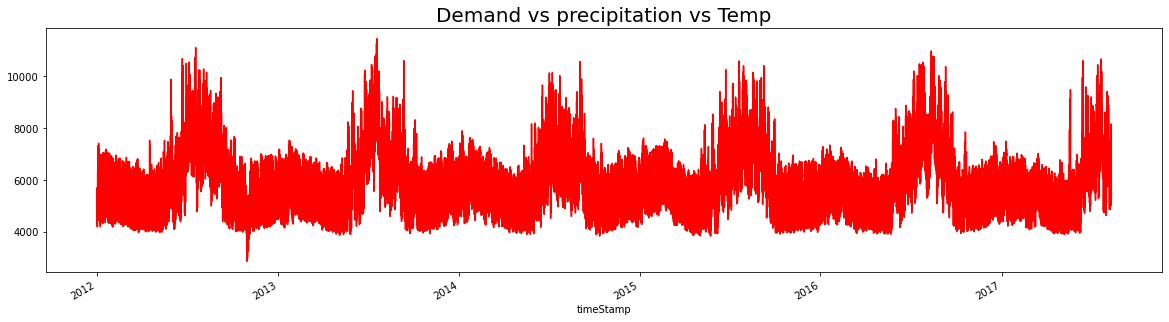

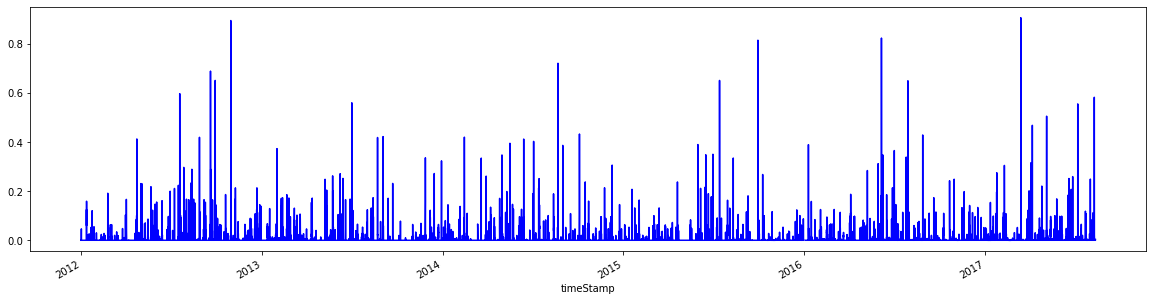

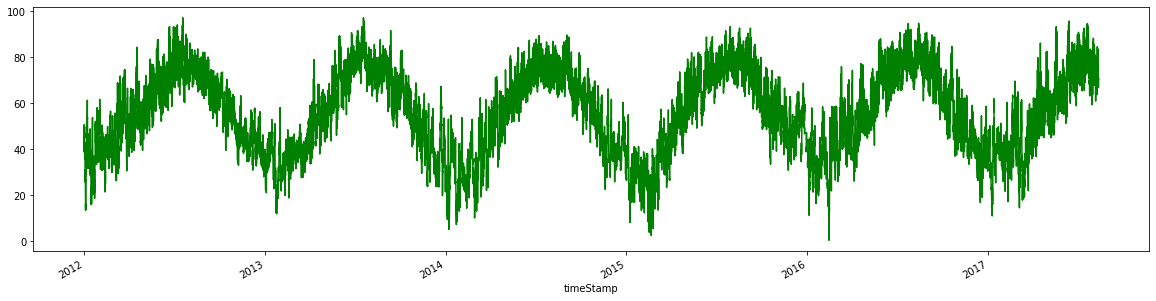

In [29]:
## also the data is hourly basis, but for now let us analyze the data on daily basis as it is less intensive

plt.figure(figsize=(20,5))
plt.title('Demand vs precipitation vs Temp',size=20)

df['demand'].plot(color='red')
plt.figure(figsize=(20,5))
df['precip'].plot(color='blue')
plt.figure(figsize=(20,5))
df['temp'].plot(color='green')
plt.show()


In [30]:
## we can see correlation in demand and temperature data,, they almost move in the same pattern,,
## there is high demand of electricy in high temp--summer
## also we can see spikes in precipitation during the same time when demand is high is temp is high as well

In [31]:
## let us see the correlation numerically

print('correlation of demand with precipitation',df['demand'].corr(df['precip']))
print('correlation of demand with temperature',df['demand'].corr(df['temp']))

correlation of demand with precipitation 0.011426799887495918
correlation of demand with temperature 0.5107702463470214


In [32]:
## but the numerical value does not tell us there is very high correlation,, may be there is high fluctuation and outliers


In [33]:
# let us resample the data into daily level

In [34]:
ny_df = df.copy()

In [35]:
ny_df_daily=ny_df.resample('D').mean()

In [36]:
ny_df_daily.head() # now our data is in daily periods

demand    precip       temp
timeStamp                                   
2012-01-01  4954.833333  0.002487  46.510000
2012-01-02  5302.954167  0.000000  40.496667
2012-01-03  6095.512500  0.000000  26.672500
2012-01-04  6336.266667  0.000000  20.585000
2012-01-05  6130.245833  0.000000  33.577500

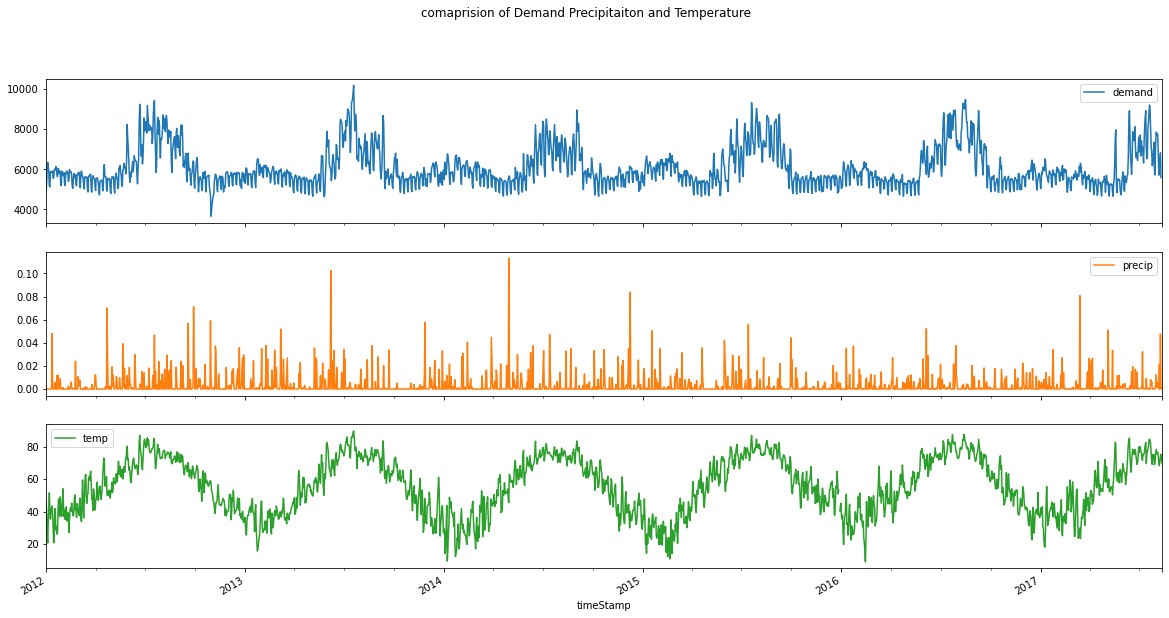

In [44]:
## plotting the data 


ny_df_daily.plot(subplots=True,figsize=(20,10),title='comaprision of Demand Precipitaiton and Temperature')
plt.show()

In [45]:
## now the data looks more smooth, as we have less data after resmapling

In [47]:
print('correlation of demand with precipitation',ny_df_daily['demand'].corr(ny_df_daily['precip']))
print('correlation of demand with temperature',ny_df_daily['demand'].corr(ny_df_daily['temp']))
## little improvement of correlaiton from previous value

correlation of demand with precipitation 0.03449836635050772
correlation of demand with temperature 0.5608970958911424


In [48]:
ny_df_daily.isna().sum()

demand    2
precip    1
temp      1
dtype: int64

In [49]:
## sice there are mising values let us impute them

ny_df_daily.fillna(method='ffill',inplace=True)

In [51]:
ny_df_daily.isna().sum() # no-missing values

demand    0
precip    0
temp      0
dtype: int64

In [53]:
## now let us analyze the data and build model using Prophet

In [ ]:
## prophet needs time-index to be renamed as 'ds' and column being analyzed as 'y'

In [65]:
#dict for renaming

rename= {'timeStamp':'ds','demand':'y'}

In [68]:
ny_df_demand = ny_df_daily.reset_index()[['timeStamp','demand']].rename(rename,axis=1)

In [69]:
ny_df_demand.head()

ds            y
0 2012-01-01  4954.833333
1 2012-01-02  5302.954167
2 2012-01-03  6095.512500
3 2012-01-04  6336.266667
4 2012-01-05  6130.245833

In [71]:
ny_df_demand.isna().sum() #no missing values

ds    0
y     0
dtype: int64

### Splitting the data 80-20

In [75]:
size = int(len(ny_df_demand)*0.9)
ny_train = ny_df_demand[:size]
ny_test = ny_df_demand[size:]

In [83]:
no_of_pred = ny_test.shape[0]
no_of_pred

206

### Univariate Analysis

In [77]:
## creating a model

model = Prophet(interval_width=0.95, yearly_seasonality=True)

In [78]:
model.fit(ny_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
model.params

{'k': array([[0.14139446]]),
 'm': array([[0.58880563]]),
 'delta': array([[-2.12768077e-07, -7.88935591e-03, -1.43387457e-01,
         -6.55646514e-05, -4.96225701e-08,  2.36089383e-08,
          2.34978038e-07, -8.42186995e-08, -3.26399291e-09,
          3.26483860e-08, -2.63660495e-08, -9.73013051e-02,
         -7.69441282e-03,  4.62964070e-08, -4.25279111e-08,
          2.71506910e-01, -3.49015271e-08, -1.54666231e-07,
         -1.14362717e-01, -9.47877672e-02, -1.89751188e-08,
         -5.14367649e-10,  3.72312425e-08, -1.89156655e-08,
          1.45669210e-01]]),
 'sigma_obs': array([[0.04665888]]),
 'beta': array([[-3.30592600e-02, -6.98553232e-02,  5.90018345e-02,
          4.70024016e-02, -1.31341299e-02, -5.38345666e-03,
         -3.23292389e-03, -1.49937349e-03,  2.36123143e-03,
         -8.43744179e-03,  3.37310850e-03,  4.55584099e-03,
         -8.09692646e-03, -4.15734399e-03,  7.65623334e-03,
         -2.51059724e-03, -8.90845823e-04,  1.00798741e-03,
         -4.4518624

In [87]:
## let us make a dataframe for our predictions

future_df = model.make_future_dataframe(periods=no_of_pred)
future_df.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

In [89]:
prediction = model.predict(future_df)

In [91]:
prediction.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
2046 2017-08-08  6317.356851  6907.504169  8732.892712  6191.979880   
2047 2017-08-09  6317.869875  6873.153190  8664.770426  6191.668837   
2048 2017-08-10  6318.382899  6881.294059  8701.847472  6191.357793   
2049 2017-08-11  6318.895922  6775.880619  8620.539357  6191.046750   
2050 2017-08-12  6319.408946  6121.307892  8118.454659  6190.735706   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
2046  6434.895504     1498.457468           1498.457468           1498.457468   
2047  6435.972680     1488.190291           1488.190291           1488.190291   
2048  6437.049856     1441.447747           1441.447747           1441.447747   
2049  6438.127032     1390.892250           1390.892250           1390.892250   
2050  6439.204209      808.404753            808.404753            808.404753   

          weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
2046  245.719200    245.719200    245.719200  1252.738268   1252.738268   
2047  243.684190    243.684190    243.684190  1244.506101   1244.506101   
2048  201.881716    201.881716    201.881716  1239.566031   1239.566031   
2049  153.119718    153.119718    153.119718  1237.772532   1237.772532   
2050 -430.505866   -430.505866   -430.505866  1238.910619   1238.910619   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
2046   1252.738268                   0.0                         0.0   
2047   1244.506101                   0.0                         0.0   
2048   1239.566031                   0.0                         0.0   
2049   1237.772532                   0.0                         0.0   
2050   1238.910619                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
2046                         0.0  7815.814320  
2047                         0.0  7806.060166  
2048                         0.0  7759.830646  
2049                         0.0  7709.788173  
2050                         0.0  7127.813699

In [92]:
## extracting few parameters
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2046 2017-08-08  7815.814320  6907.504169  8732.892712
2047 2017-08-09  7806.060166  6873.153190  8664.770426
2048 2017-08-10  7759.830646  6881.294059  8701.847472
2049 2017-08-11  7709.788173  6775.880619  8620.539357
2050 2017-08-12  7127.813699  6121.307892  8118.454659

In [102]:
compare_df = pd.concat([ny_df_demand.set_index('ds')['y'],prediction.set_index('ds')['yhat']],axis=1)

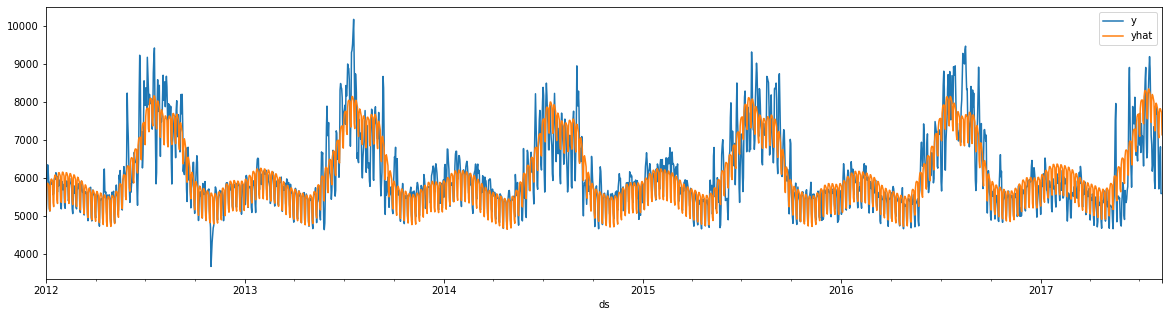

In [103]:
compare_df.plot(figsize=(20,5))

In [104]:
## we can see that the fluctuation in original data is captured by the prediciton very well, although the peak 
# and falls are not being modeled accurately

## but the seasonality is being captured very well
## if we could include exogenous variable, maybe it could predict this to a better extent 

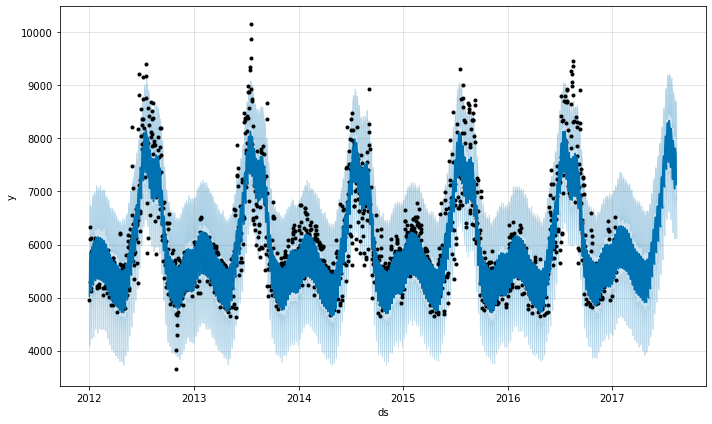

In [105]:
fig_model = model.plot(prediction)

In [142]:
## the dark blue band shows the value being prediced by our model 
## the light blue region shows the 95 % conf interval which captures the original data (back dots) quite well

## extreme value not captured well

In [107]:
## let us plot the components in the data

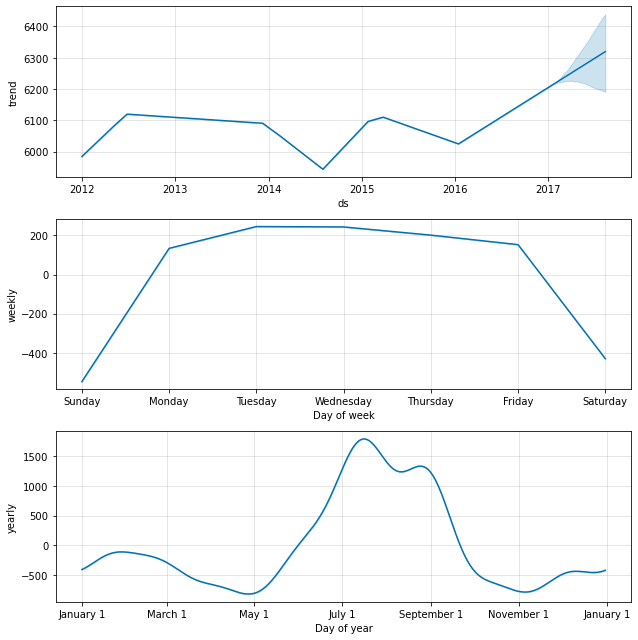

In [108]:
figure_comp = model.plot_components(prediction)

In [109]:
## the trend component shows the linear trend in the data,, we can see almost 7 changepoints in the plot
## this is represented by bent in the curve

## we can also see some weekly seasonality captured in the data,, more electriciy consumed during weekdays than on weekend
## may be factories and industries being operated on weekdays shows this pattern

## we can also see the promimnet seasonality yearly,, more deamnd during summer (may-end of september)

In [110]:
## we can also see the changepoints based on the value we provide to the model

In [111]:
from fbprophet.plot import add_changepoints_to_plot

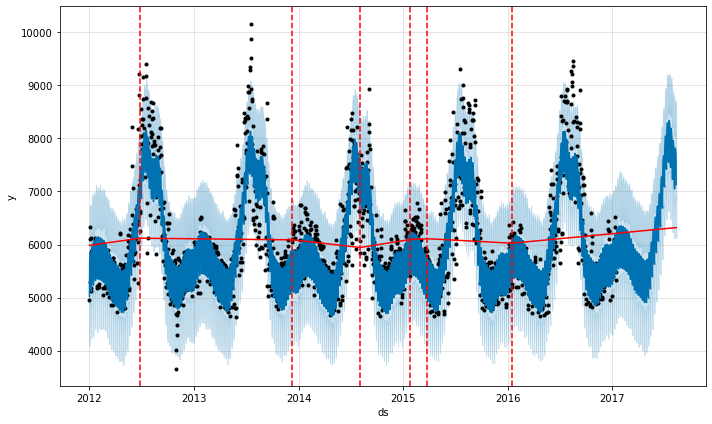

In [112]:
figu = model.plot(prediction)
a  = add_changepoints_to_plot(figu.gca(),model,prediction)

In [113]:
## we can see 6 intersection,, thus 6 changepoints the data

In [114]:
## we can also manually calculate the changepoints usiung the delta parameters from our trained model

In [125]:
deltas = model.params['delta'].mean(0)

In [127]:
model.params['delta']

array([[-2.12768077e-07, -7.88935591e-03, -1.43387457e-01,
        -6.55646514e-05, -4.96225701e-08,  2.36089383e-08,
         2.34978038e-07, -8.42186995e-08, -3.26399291e-09,
         3.26483860e-08, -2.63660495e-08, -9.73013051e-02,
        -7.69441282e-03,  4.62964070e-08, -4.25279111e-08,
         2.71506910e-01, -3.49015271e-08, -1.54666231e-07,
        -1.14362717e-01, -9.47877672e-02, -1.89751188e-08,
        -5.14367649e-10,  3.72312425e-08, -1.89156655e-08,
         1.45669210e-01]])

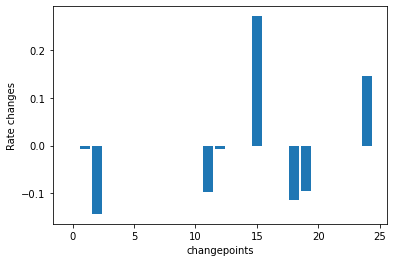

In [131]:
plt.bar(range(len(deltas)),deltas)
plt.xlabel('changepoints')
plt.ylabel('Rate changes')
plt.show()

# 25 - since propohet can capture upto 25 change points

In [130]:
## we can see 6 prominent rate changes and 2 minor changepoints

In [134]:
len(model.changepoints) # 25 - since propohet can capture upto 25 change points

25

In [135]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(model,prediction)
py.iplot(fig)

### Crossvalidation and Performance Metrics

In [136]:
from fbprophet.diagnostics import cross_validation

In [137]:
cv_results = cross_validation(model,initial='731 days',horizon='365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-01-19 00:00:00 and 2016-01-19 00:00:00


In [138]:
cv_results.head()

ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 2014-01-20  6126.668236  5300.467676  7041.010720  5703.550000 2014-01-19
1 2014-01-21  6209.559740  5364.325075  7064.664028  6314.195833 2014-01-19
2 2014-01-22  6254.791705  5375.137226  7153.985144  6621.958333 2014-01-19
3 2014-01-23  6277.234303  5443.366919  7208.017635  6693.558333 2014-01-19
4 2014-01-24  6264.550563  5435.152713  7133.957140  6693.000000 2014-01-19

In [139]:
from fbprophet.diagnostics import performance_metrics
per_met = performance_metrics(cv_results)
per_met

horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  214549.816212  463.195225  344.339168  0.050183   
1    37 days 00:00:00  210482.484384  458.783701  339.509839  0.049666   
2    37 days 12:00:00  215098.954109  463.787617  344.044439  0.050169   
3    38 days 00:00:00  214703.071714  463.360628  343.078707  0.050090   
4    38 days 12:00:00  217241.202298  466.091410  347.239281  0.050659   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  609502.605947  780.706479  610.544249  0.098256   
654 363 days 12:00:00  633519.355151  795.939291  621.029529  0.099221   
655 364 days 00:00:00  596141.586904  772.102057  608.290334  0.097506   
656 364 days 12:00:00  640547.261023  800.341965  619.999468  0.098416   
657 365 days 00:00:00  614635.707822  783.987058  610.340260  0.097033   

        mdape  coverage  
0    0.040089  0.928571  
1    0.039337  0.928571  
2    0.039769  0.923077  
3    0.039769  0.923077  
4    0.040601  0.923077  
..        ...       ...  
653  0.087142  0.862637  
654  0.088758  0.857143  
655  0.088758  0.862637  
656  0.088758  0.857143  
657  0.088758  0.857143  

[658 rows x 7 columns]

In [140]:
## we can see rmse being increased with passage of time

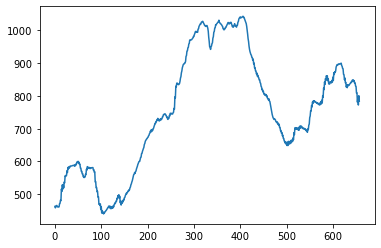

In [141]:
per_met['rmse'].plot()

### Multivariate Analysis

In [143]:
## since demand alone may not capture the future trend of the data,, it is better to add additional features which
## could help in predicting the future more accurately

## this is what multivariate analysis help us achieve

In [153]:
ny_df_daily.head()

index  timeStamp       demand    precip       temp
0      0 2012-01-01  4954.833333  0.002487  46.510000
1      1 2012-01-02  5302.954167  0.000000  40.496667
2      2 2012-01-03  6095.512500  0.000000  26.672500
3      3 2012-01-04  6336.266667  0.000000  20.585000
4      4 2012-01-05  6130.245833  0.000000  33.577500

In [171]:
## let's make a copy

ny_df_dataframe = ny_df_daily.copy()

In [172]:
# extract month from the timestamp column which could serve in extracting additional features
ny_df_dataframe['month'] = ny_df_dataframe['timeStamp'].dt.month

In [173]:
ny_df_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      2051 non-null   int64         
 1   timeStamp  2051 non-null   datetime64[ns]
 2   demand     2051 non-null   float64       
 3   precip     2051 non-null   float64       
 4   temp       2051 non-null   float64       
 5   month      2051 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 96.3 KB


In [174]:
ny_df_dataframe.head()

index  timeStamp       demand    precip       temp  month
0      0 2012-01-01  4954.833333  0.002487  46.510000      1
1      1 2012-01-02  5302.954167  0.000000  40.496667      1
2      2 2012-01-03  6095.512500  0.000000  26.672500      1
3      3 2012-01-04  6336.266667  0.000000  20.585000      1
4      4 2012-01-05  6130.245833  0.000000  33.577500      1

In [175]:
ny_df_dataframe.drop(['index','precip'],axis=1,inplace=True)

In [176]:
ny_df_dataframe.head()

timeStamp       demand       temp  month
0 2012-01-01  4954.833333  46.510000      1
1 2012-01-02  5302.954167  40.496667      1
2 2012-01-03  6095.512500  26.672500      1
3 2012-01-04  6336.266667  20.585000      1
4 2012-01-05  6130.245833  33.577500      1

In [177]:
## rename timestamp to ds and make it as an index also rename demand valriabe to y are required by fbprophet

In [180]:
ny_df_dataframe = ny_df_dataframe.rename(columns={'timeStamp':'ds','demand':'y'})


In [182]:
ny_df_dataframe.set_index('ds',inplace=True)
ny_df_dataframe.head()

y       temp  month
ds                                       
2012-01-01  4954.833333  46.510000      1
2012-01-02  5302.954167  40.496667      1
2012-01-03  6095.512500  26.672500      1
2012-01-04  6336.266667  20.585000      1
2012-01-05  6130.245833  33.577500      1

In [183]:
### Feature engineering

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4a0178af0>,
      dtype=object)

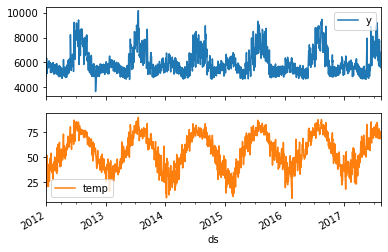

In [186]:
ny_df_dataframe[['y','temp']].plot(subplots=True)

In [187]:
## let us make a column of tempture such that if divides the temp into 3 values, normal ,very low and vey high
## since our model was doing poorly on extreme condition,, may be this is the good idea

In [194]:
def temp_splitter(temp):
    if temp >80: return 3
    elif temp <10: return 1
    else: return 2

In [195]:
ny_df_dataframe['month_div']=ny_df_dataframe['temp'].apply(temp_splitter)

In [196]:
ny_df_dataframe.head()

y       temp  month  month_div
ds                                                  
2012-01-01  4954.833333  46.510000      1          2
2012-01-02  5302.954167  40.496667      1          2
2012-01-03  6095.512500  26.672500      1          2
2012-01-04  6336.266667  20.585000      1          2
2012-01-05  6130.245833  33.577500      1          2

In [197]:
## let us also divide the month into 3 bins: each bin has 4 months

ny_df_dataframe['month_bins'] = pd.cut(ny_df_dataframe['month'],bins=3, labels=False)

In [198]:
ny_df_dataframe.head()

y       temp  month  month_div  month_bins
ds                                                              
2012-01-01  4954.833333  46.510000      1          2           0
2012-01-02  5302.954167  40.496667      1          2           0
2012-01-03  6095.512500  26.672500      1          2           0
2012-01-04  6336.266667  20.585000      1          2           0
2012-01-05  6130.245833  33.577500      1          2           0

In [199]:
### splitting the data

In [301]:
size = int(len(ny_df_dataframe)*0.9)
ny_train = ny_df_dataframe[:size]
ny_test = ny_df_dataframe[size:]

In [302]:
ny_train = ny_train.reset_index()

In [303]:
ny_test = ny_test.reset_index()

In [304]:
# ny_test['month_div'].isna().sum()

In [305]:
ny_train.shape

(1845, 6)

In [306]:
ny_train.columns

Index(['ds', 'y', 'temp', 'month', 'month_div', 'month_bins'], dtype='object')

In [307]:
no_of_future_obs=ny_test.shape[0]
no_of_future_obs

206

In [308]:
ny_train.tail()

ds            y       temp  month  month_div  month_bins
1840 2017-01-14  5477.290000  31.520417      1          2           0
1841 2017-01-15  5334.462167  33.471250      1          2           0
1842 2017-01-16  5673.924917  34.530417      1          2           0
1843 2017-01-17  5912.173958  39.486250      1          2           0
1844 2017-01-18  5872.280875  39.971250      1          2           0

In [309]:
model_mv = Prophet(interval_width=0.95, yearly_seasonality=True) # deault takes ds and y columns

In [310]:
model_mv.add_regressor('month_div',standardize=False)
model_mv.add_regressor('month_bins',standardize=False)

In [311]:
## we can add multiplicative mode in the mode parameter if there seems to be trend in the data

In [312]:
# fitting the model
model_mv.fit(ny_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [313]:
model_mv.params

{'k': array([[0.17949786]]),
 'm': array([[0.33105926]]),
 'delta': array([[-4.38258004e-08, -4.33831222e-06, -1.46137597e-01,
         -9.64901865e-02,  2.63239105e-08,  2.92029676e-02,
          2.45231662e-02,  2.46737054e-03,  8.64061003e-05,
          1.98405219e-05, -5.38080340e-09, -2.42909309e-02,
         -1.47441774e-02, -7.26091336e-07,  8.23838673e-09,
          1.34911929e-01,  2.28953310e-07, -7.58926182e-07,
         -8.06381256e-02, -7.29934369e-02, -2.34637806e-07,
         -3.43409891e-08, -2.34626298e-08,  1.46331454e-07,
          1.40107532e-01]]),
 'sigma_obs': array([[0.03973132]]),
 'beta': array([[-0.03399656, -0.05864085,  0.05113   ,  0.0407351 , -0.00869096,
         -0.00224939, -0.00696789, -0.00316344,  0.0032278 , -0.00679318,
          0.00080898,  0.00298716, -0.00564262, -0.00314316,  0.00422689,
         -0.00235586,  0.00118533,  0.00095902, -0.00138987, -0.00088516,
         -0.02786732,  0.02441339,  0.02035923,  0.00155749, -0.00471933,
         

In [314]:
future_pred_df = model_mv.make_future_dataframe(periods=no_of_future_obs) ### why making more ????
future_pred_df.shape

(2051, 1)

In [315]:
future_pred_df['month_div'] = ny_df_dataframe['month_div'].values
future_pred_df['month_bins'] = ny_df_dataframe['month_bins'].values

In [316]:
future_pred_df.head()

ds  month_div  month_bins
0 2012-01-01          2           0
1 2012-01-02          2           0
2 2012-01-03          2           0
3 2012-01-04          2           0
4 2012-01-05          2           0

In [317]:
prediction = model_mv.predict(future_pred_df)

In [318]:
prediction[['yhat_lower','yhat','yhat_upper']].tail()

yhat_lower         yhat   yhat_upper
2046  6756.478292  7560.605937  8345.740405
2047  6749.700574  7567.527907  8341.901283
2048  6740.624047  7536.700509  8334.184109
2049  6687.507016  7481.190425  8226.250223
2050  6113.782003  6893.169062  7687.922707

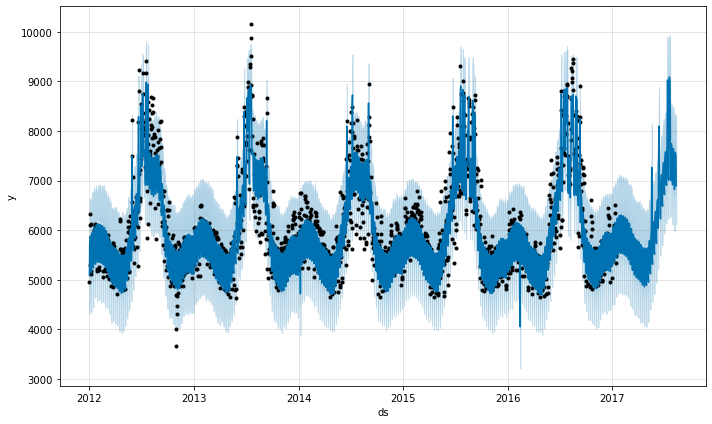

In [319]:
fig1=model_mv.plot(prediction)

In [320]:
## since we have added extra columns to support our prediction,, the model is able to predict with greater accuracy
## also the extreme case is handled proprly 

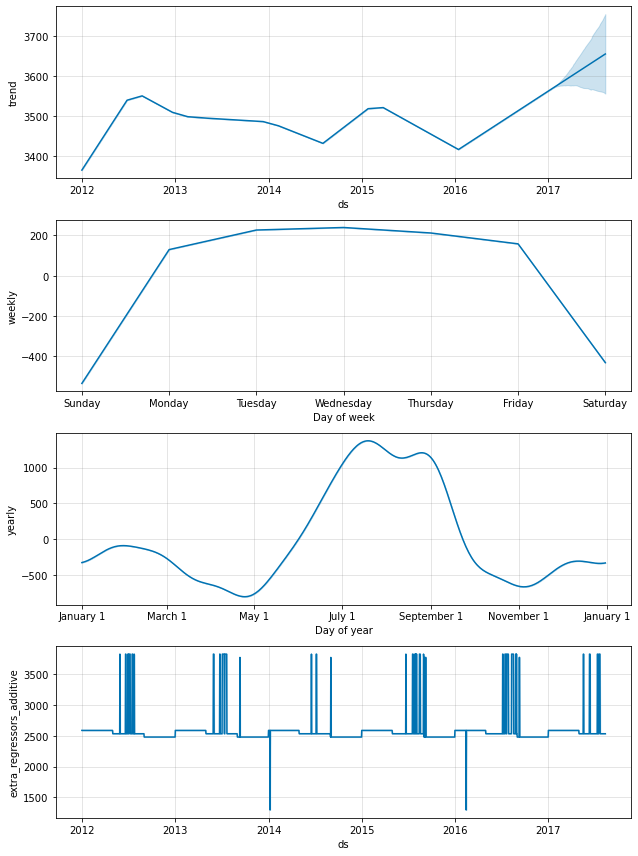

In [321]:
fig1 = model_mv.plot_components(prediction)

### evaluation 

In [322]:
cv_results = cross_validation(model=model_mv, initial='731 days', horizon='365 days') # use 2 years data predict 1 yer data
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-01-19 00:00:00 and 2016-01-19 00:00:00


horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  172642.894448  415.503182  305.763703  0.046598   
1    37 days 00:00:00  172441.131040  415.260317  305.767327  0.046697   
2    37 days 12:00:00  174737.710863  418.016400  309.022867  0.047029   
3    38 days 00:00:00  175017.177266  418.350544  309.650385  0.047190   
4    38 days 12:00:00  177080.148893  420.808922  313.268693  0.047703   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  551140.622517  742.388458  598.071148  0.097701   
654 363 days 12:00:00  548726.162375  740.760530  595.792183  0.097069   
655 364 days 00:00:00  527398.359745  726.221977  586.606694  0.095900   
656 364 days 12:00:00  535913.650007  732.061234  590.378538  0.095922   
657 365 days 00:00:00  526227.234497  725.415215  583.269724  0.094934   

        mdape  coverage  
0    0.038278  0.945055  
1    0.038342  0.945055  
2    0.038382  0.945055  
3    0.038570  0.945055  
4    0.038806  0.945055  
..        ...       ...  
653  0.083316  0.769231  
654  0.082072  0.769231  
655  0.081174  0.769231  
656  0.082072  0.763736  
657  0.081174  0.763736  

[658 rows x 7 columns]

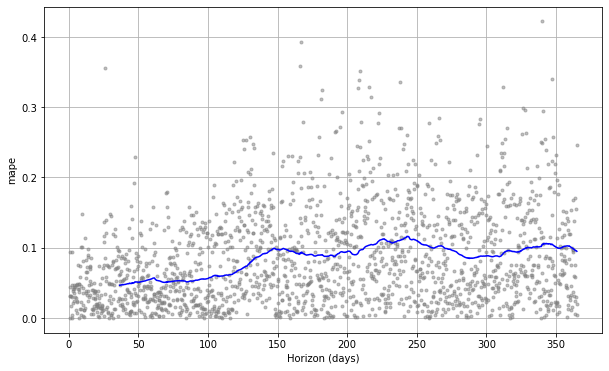

In [323]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

In [324]:
## the error term has kept increasing may be we made a bad feature engineering choice of spliiting data into 3 temp
## let us try divivin in to 2 temp range above 80 and belo 80 ,, and try again